## Homework Week 6



1. Explain the idea and calculation steps of PCA.
2. Given the following data set, how many percent of the total variance can be explained by the top 2 principal components?

```python
from sklearn.datasets import make_blobs
from pandas import DataFrame
# generate a classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=1, cluster_std=3)
```

3. What is the most significant difference between PCA and LDA?
4. Based on the data set given above, split data into 80% training and 20% test with stratification, apply PCA to pick the top 2 components, apply a classification algorithm, print the number of misclassified samples in the test set.
5. Apply LDA to the above problem.

**Problem 1: Explain the idea and calculation steps of PCA.**

Principal Component Analysis is a linear transformation technique that is used for feature extraction and dimensional reduction. It helps identify patterns in data based on correlation between features.

These are the steps for PCA:

1. Standardize the d-dimensional dataset.

2. Construct the covariance matrix.

3. Decompose the covariance matrix into its eigenvectors and eigenvalues.

4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.

5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( k ≤ d ).

6. Construct a projection matrix W from the "top" k eigenvectors.

7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

**Problem 2: Given the following data set, how many percent of the total variance can be explained by the top 2 principal components?**

In [162]:
from sklearn.datasets import make_blobs
from pandas import DataFrame
# generate a classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=1, cluster_std=3)

In [163]:
from sklearn.preprocessing import StandardScaler
import numpy as np
#scale the data
sc = StandardScaler()
X_std = sc.fit_transform(X)
#create covariance matrix
cov_mat = np.cov(X_std.T)
#covariance matrix shape
cov_mat.shape

(10, 10)

In [164]:
#Eigendecomposition of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
#total variance
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

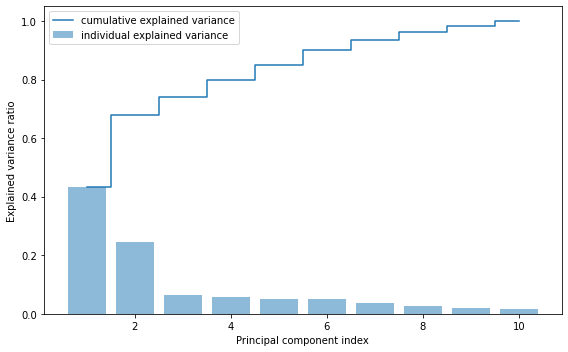

In [165]:
%matplotlib inline
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)


plt.bar(range(1, 11), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 11), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

The total variance that can be explained by the top 2 principal components is approximately 70%.

**Problem 3: What is the most significant difference between PCA and LDA?**

The main difference between Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) is that PCA maximizes the explained variance and LDA maximizes separability between classes. Both methods can be used to reduce the number of dimension in a data set. They do this using different methods.

**Problem 4. Based on the data set given above, split data into 80% training and 20% test with stratification, apply PCA to pick the top 2 components, apply a classification algorithm, print the number of misclassified samples in the test set.**

In [166]:
#partition X, y into 80% training and 20% test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [167]:
#using sc = StandardScaler() from earlier to scale the training set
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [168]:
#principal component analysis in Scikit Learn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.42960759, 0.2478697 ])

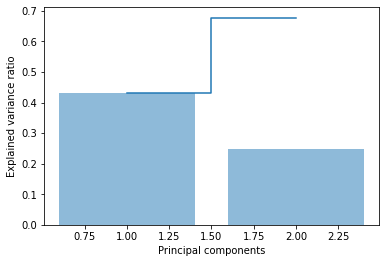

In [169]:
#plot PCA
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 3), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()
#it shows only the first two because we selected only two in the PCA above

In [170]:
from sklearn.linear_model import LogisticRegression
#logistict regression
lr = LogisticRegression(solver = 'lbfgs', multi_class='auto')
#fit logistic regression to PCA data
lr = lr.fit(X_train_pca, y_train)

#predict on test PCA data
y_pred = lr.predict(X_test_pca)
#find misclassified sampples
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 2


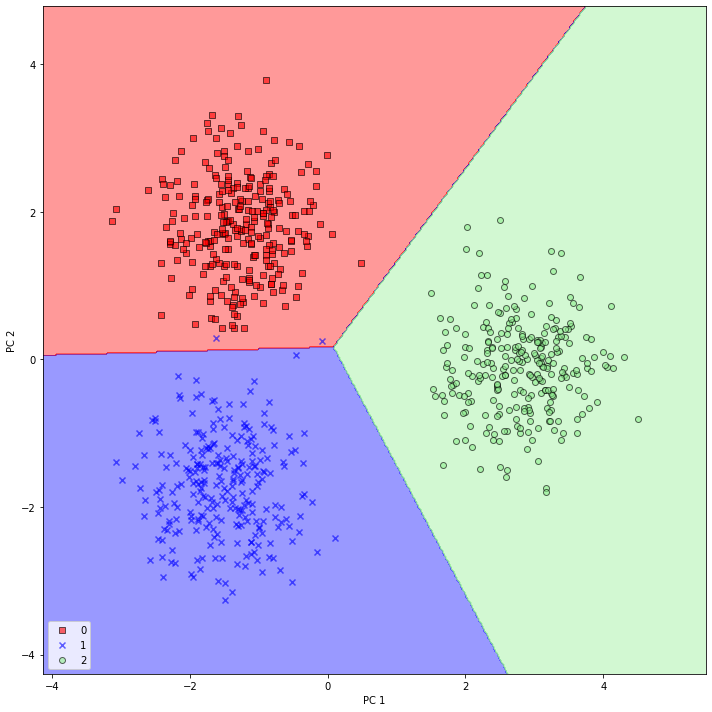

In [171]:
#plot showing the two misclassified samples
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

**Problem 5: Apply LDA to the above problem.**

In [172]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#LDA in SciKit Learn
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

#logistic regression model
lr_lda = lr.fit(X_train_lda, y_train)

#make predicitions using LDA test data
y_pred_lda = lr.predict(X_test_lda)
#find misclassified samples
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 2


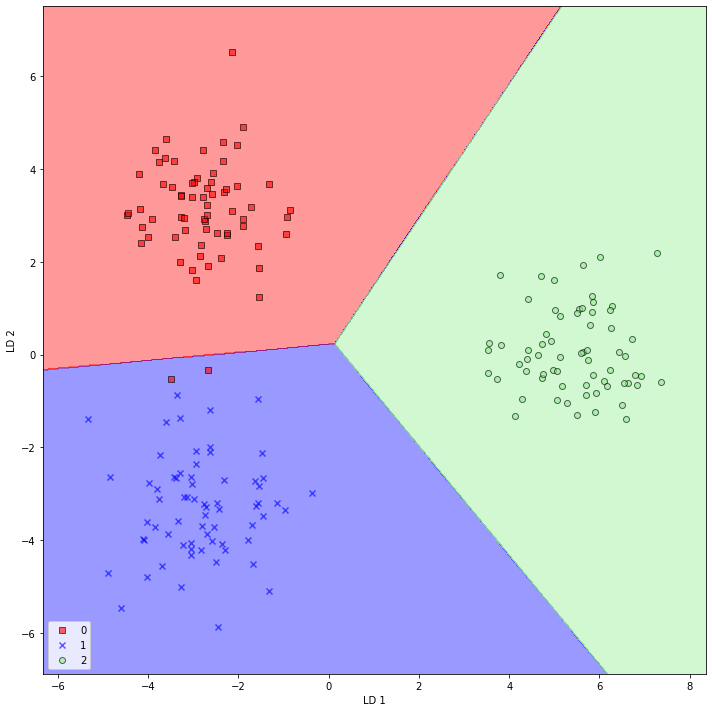

In [173]:
#plot showing the two misclassified samples
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()